# 04. PyTorch Custom Datasets Video Notebook

We've used some datasets with PyTorch Before.

But how do you get your own data into PyTorch?

One of the ways to do so is via: datasets

## Domain libraries

### 1. Get data

New important point:
* zipfile


In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it
if image_path.is_dir():
  print(f"{image_path} directory already exist, skipping it ......")
else:
  print(f"{image_path} directory already exist, creating it ......")
  image_path.mkdir(parents=True, exist_ok=True)

dataset_zip = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  print("Downloading pizza, steak, sushi image for our dataset....")
  f.write(dataset_zip.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping the downloaded file ...... ")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exist, creating it ......
Unzipping the downloaded file ...... 


In [2]:
import os
def work_through_file(dir_path):
  """
  TODO: Walks through dir_path returning its contents.
  Args:
    dir_path(str or pathlib.Path): target directory
  Returns:
    A Print out of:
      number of subdirectories in dir_path
      number of image in each subdirectory
      name of each subdirectory
  """

  for dirpath, dirnames, filenames in os.walk(dir_path):
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in path:{dirpath}")

In [3]:
work_through_file(image_path)

There are 2 directories and 0 images in path:data/pizza_steak_sushi
There are 3 directories and 0 images in path:data/pizza_steak_sushi/train
There are 0 directories and 72 images in path:data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in path:data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in path:data/pizza_steak_sushi/train/steak
There are 3 directories and 0 images in path:data/pizza_steak_sushi/test
There are 0 directories and 31 images in path:data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in path:data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in path:data/pizza_steak_sushi/test/steak


## 2.1 Visualizing and image
Let's write some code to:



1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Open the image
  *  with **PIL**
  *  with `matplotlib.pyplot`: At first, you have to convert the image into array from 'jpg' using `np.asarray`


sushi
random image path: data/pizza_steak_sushi/test/sushi/46797.jpg
Image class: sushi
Image height: 384
Image width: 512


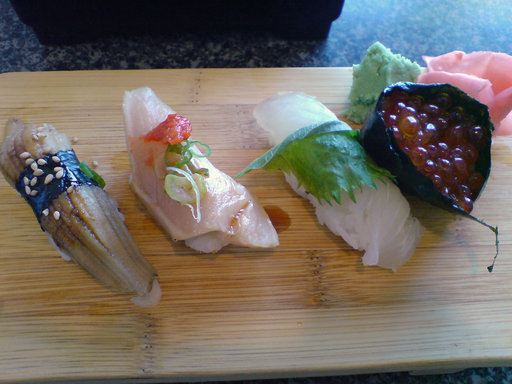

In [4]:
import random
from PIL import Image

# Set the ramdom seed
#random.seed(42)

# Get all image path(* means any combination)
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# open the image
img = Image.open(random_image_path)

# Take a look the image and metadata
print(f"random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


In [5]:
# Visualize the image with matplotlib.pyplot

The class is sushi | Image shape: (384, 512, 3)


(-0.5, 511.5, 383.5, -0.5)

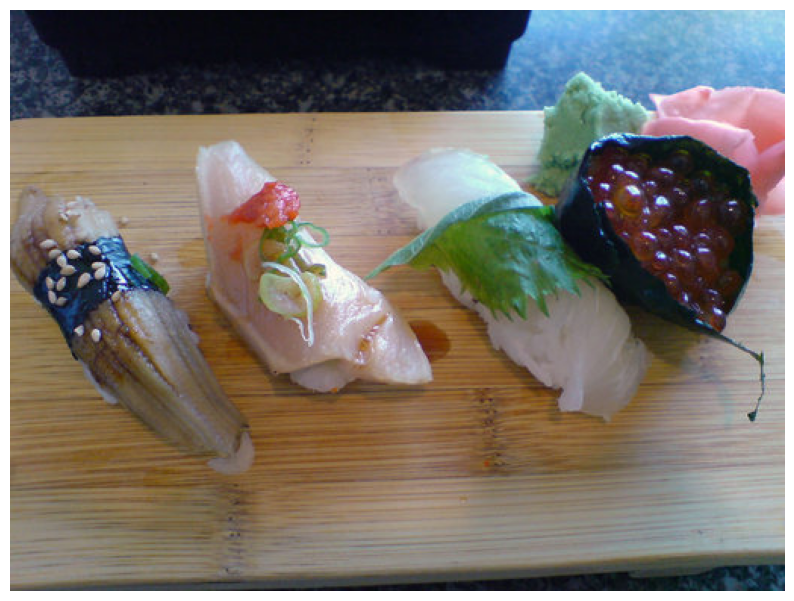

In [6]:
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.asarray(img)
plt.figure(figsize=(10,8))
plt.imshow(img)
print(f"The class is {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

# 3. Transforming data

Before we can use our image with PyTorch:
1. Turn your target data into tensors
2. Turn it into a `torch.untils.data.Dataset` and subsequently a `DataLoader`

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [8]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the image to 64 * 64
    transforms.Resize(size=(64, 64)),
    # Filp the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # tranform our image to tensor
    transforms.ToTensor()
])

In [9]:
img_tensor=data_transform(img).permute(1, 2, 0)
img_tensor.shape

torch.Size([64, 64, 3])

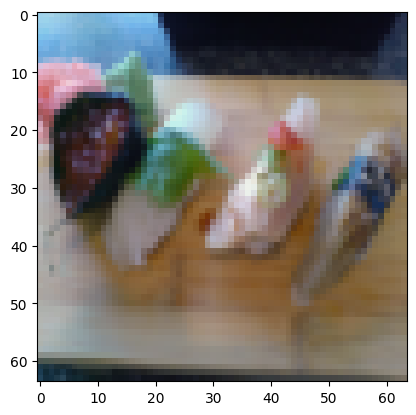

In [10]:
plt.imshow(img_tensor)

## 3.1 Visualize what's happenin' after we tranform the image to tensor

In [11]:
def plot_transform_image(image_path,
                         transform,
                         n,
                         seed=None):
  if seed:
    random.seed(42)
  random_choice = random.sample(image_path, k=n)
  for choice in random_choice:
    with Image.open(choice) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].set_title(f"oringal\nSize:{f.size}")

      ax[0].imshow(f)
      ax[0].axis(False)

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      choice_tensor = transform(f).permute(1, 2, 0)
      ax[1].imshow(choice_tensor)
      ax[1].set_title(f"transformed image\nShape:{choice_tensor.shape}")
      ax[1].axis(False)




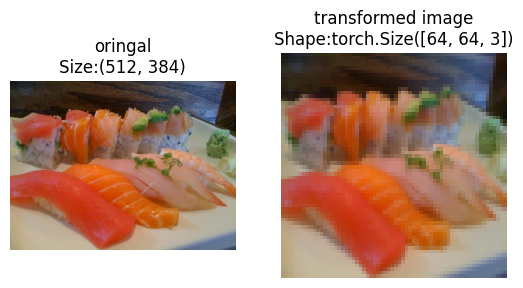

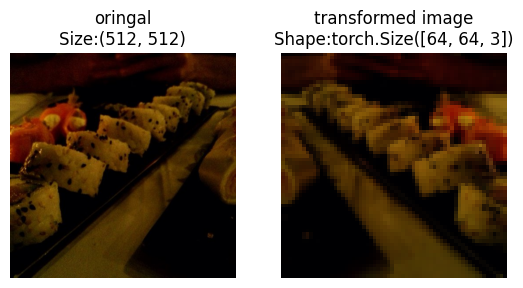

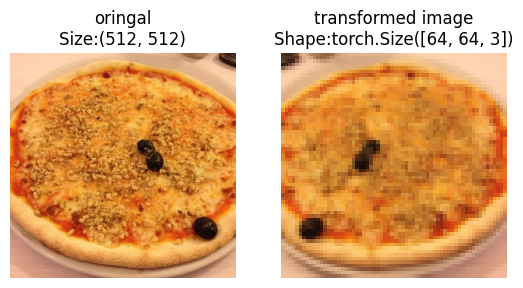

In [12]:
plot_transform_image(image_path_list,
                     transform=data_transform,
                     n=3,
                     seed=42)

# 4. Option 1: Loading image data using `ImageFolder`


In [13]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [14]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [15]:
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [16]:
len(train_data)

225

In [17]:
# Get the label/target from our train data
class_dict = train_data.class_to_idx
class_names = train_data.classes

In [18]:
# Index on the train data Dataset to get singel image
len(train_data[0])
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Iamge data type:{img.dtype}")
print(f"Image target:{label}")
print(f"Image label:{class_names[label]}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

## 4.1 Turn loaded images into `DataLoader`
A `DataLoader` is going to help us turn our `Dataset` into iterables and we can customise the `batch_size` so our model can see the `batch_size`  image at a time

In [19]:
# Turn train and test datasets into DataLoader
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count())

In [20]:
# Visualize what we got
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

# 5. Option 2: Load Image data with a custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get class dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything

* No limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you cloud create `Dataset` out of almost anything, it doesn't means it'll work
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or not peformaning well


### 5.1 Creating a helper funciton to get class names

We want a function to:
1. Get the clss names using `os.scandir()` to traverse a target directory

In [21]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [22]:
target_dictionary = train_dir

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class name could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please try again after check it")

  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx




In [23]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory(the directory we'd like to get data from)
3. Create several attributes:
  * `paths` - paths of our images
  * `transform` - the transform we'd like to use
  * `classes` - a list of the target classes
  * `class_to_idx` - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index


In [24]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.untils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attribute
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx = find_classes(targ_dir)
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    """Open an image via a path and return it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """Return the total number of samples"""
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
    """Return one sample of data, data and label (X,y)"""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx



In [25]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [26]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)




In [27]:
len(train_data_custom)

225

In [28]:
train_data_custom[0]


(tensor([[[0.0078, 0.0078, 0.0078,  ..., 0.0196, 0.0157, 0.0471],
          [0.0078, 0.0118, 0.0118,  ..., 0.0196, 0.0314, 0.0471],
          [0.0078, 0.0157, 0.0157,  ..., 0.0275, 0.0431, 0.0588],
          ...,
          [0.5608, 0.6353, 0.7373,  ..., 0.0196, 0.0235, 0.0235],
          [0.3961, 0.5529, 0.6275,  ..., 0.0196, 0.0235, 0.0196],
          [0.1412, 0.3373, 0.5569,  ..., 0.0196, 0.0157, 0.0157]],
 
         [[0.0157, 0.0157, 0.0157,  ..., 0.0588, 0.0431, 0.0667],
          [0.0157, 0.0196, 0.0196,  ..., 0.0588, 0.0627, 0.0706],
          [0.0157, 0.0235, 0.0235,  ..., 0.0588, 0.0706, 0.0824],
          ...,
          [0.5020, 0.4980, 0.5451,  ..., 0.0157, 0.0196, 0.0196],
          [0.3686, 0.4941, 0.4980,  ..., 0.0157, 0.0196, 0.0157],
          [0.1216, 0.3098, 0.5020,  ..., 0.0157, 0.0118, 0.0118]],
 
         [[0.0118, 0.0118, 0.0118,  ..., 0.0745, 0.0510, 0.0667],
          [0.0118, 0.0157, 0.0157,  ..., 0.0667, 0.0588, 0.0588],
          [0.0039, 0.0118, 0.0118,  ...,

In [29]:
# Check for equality between original ImageFolder Dataset and ImageFolderCutsom dataset
print(train_data.classes == train_data_custom.classes)

True


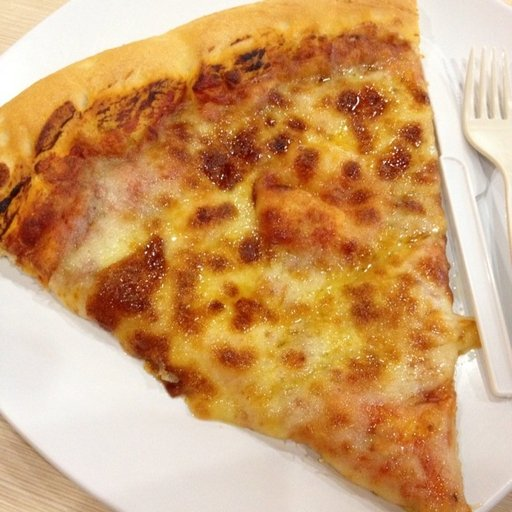

In [30]:
train_data_custom.load_image(143)

### 5.3 Create a function to display random images
1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset
5. Setup a matplotlib plot
6. Loop Through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our image line up with matplotlib

In [31]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool=True,
                          seed: int=None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10")

  # 3. Seed the random seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)),k=n)

  # 5. Setup the plot function
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0)

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f"Class:{classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



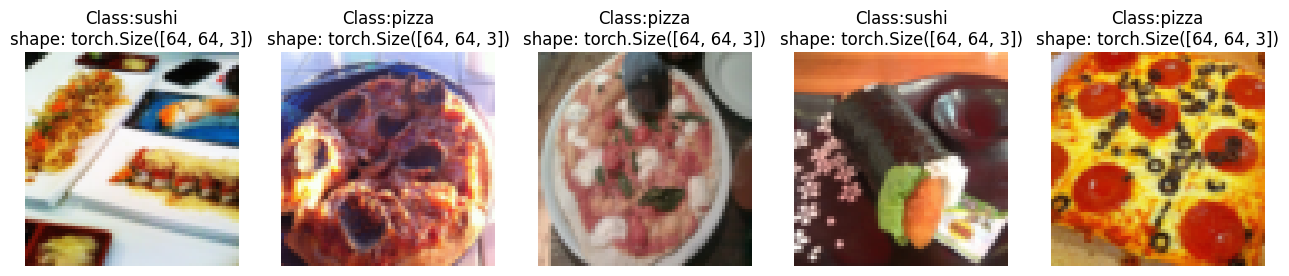

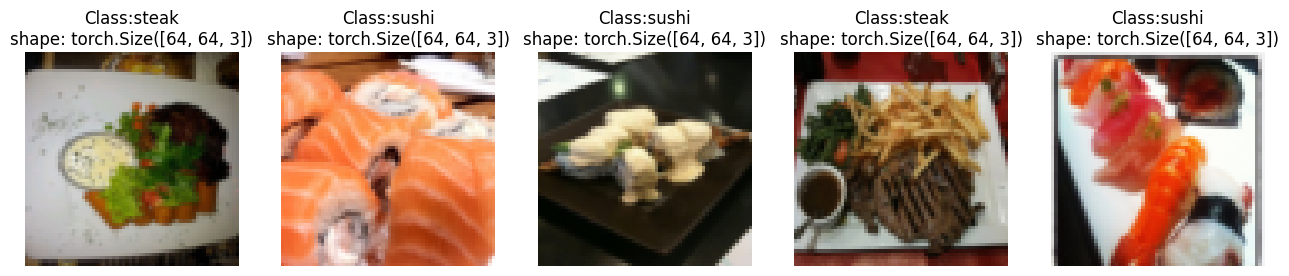

In [32]:
# Display random images from the ImageFolder Created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=42
                      )
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=42)

In [33]:
train_data_custom

### Turn custom loaded images into `DataLoader`





In [34]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)



In [35]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# 6. Other forms of tranforms(with data augmentation)

`Data augmentation` is the process of atificially adding diversity to your training data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision model to state of the art levels...

Blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/


In [36]:
# Let's take a look at trivialaugment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [37]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

In [38]:
image_path_list

[PosixPath('data/pizza_steak_sushi/train/sushi/794647.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2641778.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2871052.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2017378.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/748830.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1209865.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/93139.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1070104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2813454.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/385154.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1957449.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2873571.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3081701.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/169392.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2574453.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/710379.jpg'),
 PosixPath('dat

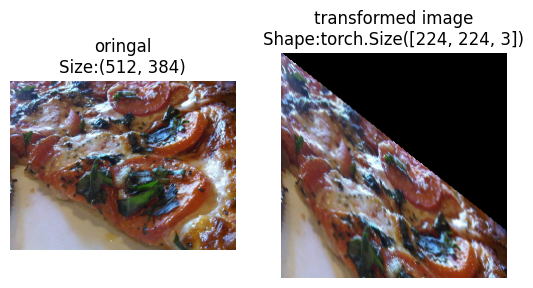

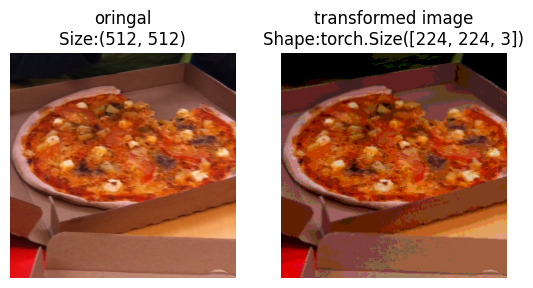

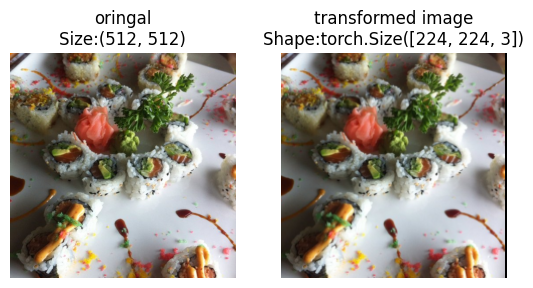

In [39]:
plot_transform_image(image_path_list,
                     train_transform,
                     3)

# 7. Model 0: Tiny VGG without data augmentation

A good website to study CNN: https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data for Model 0

In [40]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [41]:
# take a try for hwo to loading image with ImageLoader
from torchvision import datasets

# 1. we have to divide our parent directory into train_dir and test_dir
train_dir = image_path / "train"
test_dir = image_path / "test"

# 2. process different image separately
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=simple_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=simple_transform)

# 3. iterable our dataset(image) with "DataLoader"
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS)

## 7.2 Create TinyVGG model class


In [42]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [43]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 16 * 16,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape),
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x




In [44]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

In [45]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [46]:
### 7.3 Tray a forward pass on a single time

image_single, label_single = next(iter(train_dataloader))
image_single.shape, label_single.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [47]:
model_0(image_single.to(device))

tensor([[-0.0115, -0.0310,  0.0408],
        [-0.0111, -0.0343,  0.0380],
        [-0.0050, -0.0327,  0.0352],
        [ 0.0009, -0.0376,  0.0389],
        [-0.0113, -0.0338,  0.0363],
        [-0.0096, -0.0356,  0.0408],
        [-0.0127, -0.0334,  0.0398],
        [-0.0112, -0.0309,  0.0406],
        [-0.0075, -0.0345,  0.0377],
        [-0.0074, -0.0314,  0.0371],
        [-0.0068, -0.0312,  0.0354],
        [-0.0128, -0.0281,  0.0396],
        [-0.0098, -0.0335,  0.0394],
        [-0.0090, -0.0318,  0.0385],
        [-0.0128, -0.0321,  0.0380],
        [-0.0069, -0.0362,  0.0429],
        [-0.0091, -0.0334,  0.0373],
        [-0.0093, -0.0283,  0.0349],
        [-0.0099, -0.0371,  0.0384],
        [-0.0060, -0.0396,  0.0458],
        [-0.0074, -0.0404,  0.0473],
        [-0.0157, -0.0354,  0.0305],
        [-0.0102, -0.0431,  0.0467],
        [-0.0115, -0.0383,  0.0373],
        [-0.0062, -0.0328,  0.0365],
        [-0.0060, -0.0372,  0.0383],
        [-0.0096, -0.0374,  0.0391],
 

### 7.4 Use `torchinfo` to get an idea of th shapes going through our model

In [48]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

### 7.5 Create train and test loops functions

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader

* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader

In [49]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

  # Put the model in train model
  model.train()

  # Setup the train_loss and train_accuracy
  train_loss, train_acc = 0, 0

  # Loop train loss and train accuracy values
  for batch, (X, y) in enumerate(dataloader):
    # Send the data to target device
    X, y =X.to(device), y.to(device)

    # 1. Forward pass
    y_logits = model(X)

    # 2. Calculate the loss and accuracy
    loss = loss_fn(y_logits, y)
    train_loss += loss.item()
    train_acc += (torch.argmax(torch.softmax(y_logits, dim=1), dim=1) == y).sum().item() / len(y_logits)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc







In [50]:
len(train_dataloader_custom)

8

In [51]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Set our model to evalucation model
  model.eval()
  # Setup our test_loss and test_accuracy
  test_loss, test_acc = 0, 0

  # Loop trough our model in dataloder
  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      # Send our data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_logits = model(X)

      # 2. Calculate the loss and accuracy
      loss = loss_fn(test_logits, y)
      test_loss += loss.item()
      test_acc += (test_logits.argmax(dim=1) == y).sum().item() / len(test_logits)

  # Get the average loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)
  return test_loss, test_acc



### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [52]:
# Create a train function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          epochs: int,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device):

  train_start_time = timer()

  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]}

  for epoch in tqdm(range(epochs)):

    train_result_loss, train_result_acc = train_step(model=model,
                                                     dataloader=train_dataloader,
                                                     loss_fn=loss_fn,
                                                     optimizer=optimizer,
                                                     device=device)
    print(f"starting test....")
    test_result_loss, test_result_acc = test_step(model=model,
                                                  dataloader=test_dataloader,
                                                  loss_fn=loss_fn,
                                                  device=device)

    print(f"\nEpoch:{epoch} | Train Loss:{train_result_loss:.4f} | Tarin Accuracy:{train_result_acc:.2f} Test Loss:{test_result_loss:.4f} | Test Accuracy:{test_result_acc:.2f}\n")
    print("---Continue to next epoch---")

    results["train_loss"].append(train_result_loss)
    results["test_loss"].append(test_result_loss)
    results["train_acc"].append(train_result_acc)
    results["test_acc"].append(test_result_acc)
  train_end_time = timer()
  train_total_time = train_end_time - train_start_time

  return results, train_total_time



In [53]:
### 7.7 Train and evaluate model_0

In [54]:
from tqdm.auto import tqdm

In [80]:
# Set random seef
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Recreaten an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimzier
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Train Model_0
from timeit import default_timer as timer
import torch.nn
model_0_results, model_0_train_time = train(model=model_0,
                                            epochs=NUM_EPOCHS,
                                            train_dataloader=train_dataloader,
                                            test_dataloader=test_dataloader,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer,
                                            device=device)

print(f"Total train time: {model_0_train_time:0.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

starting test....

Epoch:0 | Train Loss:1.1078 | Tarin Accuracy:0.26 Test Loss:1.1362 | Test Accuracy:0.26

---Continue to next epoch---
starting test....

Epoch:1 | Train Loss:1.0846 | Tarin Accuracy:0.43 Test Loss:1.1622 | Test Accuracy:0.20

---Continue to next epoch---
starting test....

Epoch:2 | Train Loss:1.1153 | Tarin Accuracy:0.29 Test Loss:1.1695 | Test Accuracy:0.20

---Continue to next epoch---
starting test....

Epoch:3 | Train Loss:1.0990 | Tarin Accuracy:0.29 Test Loss:1.1342 | Test Accuracy:0.20

---Continue to next epoch---
starting test....

Epoch:4 | Train Loss:1.0989 | Tarin Accuracy:0.29 Test Loss:1.1433 | Test Accuracy:0.20

---Continue to next epoch---
Total train time: 4.928


In [56]:
model_0_results

{'train_loss': [1.099562630057335,
  1.0955651551485062,
  1.1009044349193573,
  1.0991186797618866,
  1.0954562723636627],
 'train_acc': [0.29296875, 0.4140625, 0.29296875, 0.29296875, 0.4140625],
 'test_loss': [1.1049007177352905,
  1.1049811840057373,
  1.1055207252502441,
  1.1052305301030476,
  1.1053335269292195],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666]}

### 7.8 Plot the loss curve of Model_0
A **Loss Curve** is a way of tracking your model's progress over time.


In [57]:
def plot_loss_curves(results: Dict[str,List[float]]):
  # Get the loss values of the results dictionary
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(loss))

  # Setup a plot
  plt.figure(figsize=(15,7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_acc")
  plt.plot(epochs, test_accuracy, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


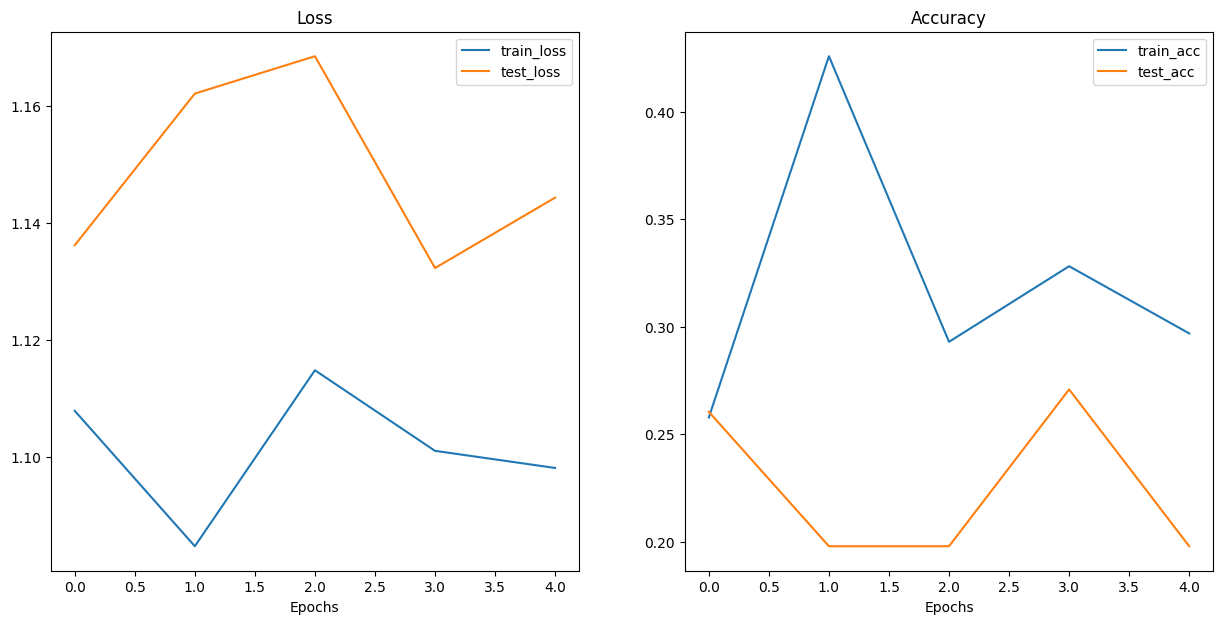

In [60]:
plot_loss_curves(model_0_results)

# 9. Model 1: TinyVGG with Data Augmentation

## 9.1 Create training transform with data augmentation

In [74]:
torch.manual_seed(42)
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

## 9.2 Create train and test `Dataset` and `DataLoader` with data augmentation

In [75]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform_simple)

In [76]:
# Turn our data into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

## 9.2 Construct and train model 1
this time we'll be using the same model architecture except this time we've augmented the training data

In [77]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Let's create a loss function and an optimzer, and then call upon our `train()` function to train and evaluate


In [78]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Train model_1
model_1_results, model_1_train_time = train(model=model_1,
                                            train_dataloader=train_dataloader_augmented,
                                            test_dataloader=test_dataloader_simple,
                                            epochs=NUM_EPOCHS,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer,
                                            device=device)

print(model_1_train_time)

  0%|          | 0/5 [00:00<?, ?it/s]

starting test....

Epoch:0 | Train Loss:1.1076 | Tarin Accuracy:0.25 Test Loss:1.1062 | Test Accuracy:0.26

---Continue to next epoch---
starting test....

Epoch:1 | Train Loss:1.0791 | Tarin Accuracy:0.43 Test Loss:1.1387 | Test Accuracy:0.26

---Continue to next epoch---
starting test....

Epoch:2 | Train Loss:1.0810 | Tarin Accuracy:0.43 Test Loss:1.1695 | Test Accuracy:0.26

---Continue to next epoch---
starting test....

Epoch:3 | Train Loss:1.1291 | Tarin Accuracy:0.30 Test Loss:1.1622 | Test Accuracy:0.26

---Continue to next epoch---
starting test....

Epoch:4 | Train Loss:1.0901 | Tarin Accuracy:0.43 Test Loss:1.1476 | Test Accuracy:0.26

---Continue to next epoch---
5.748411958999895


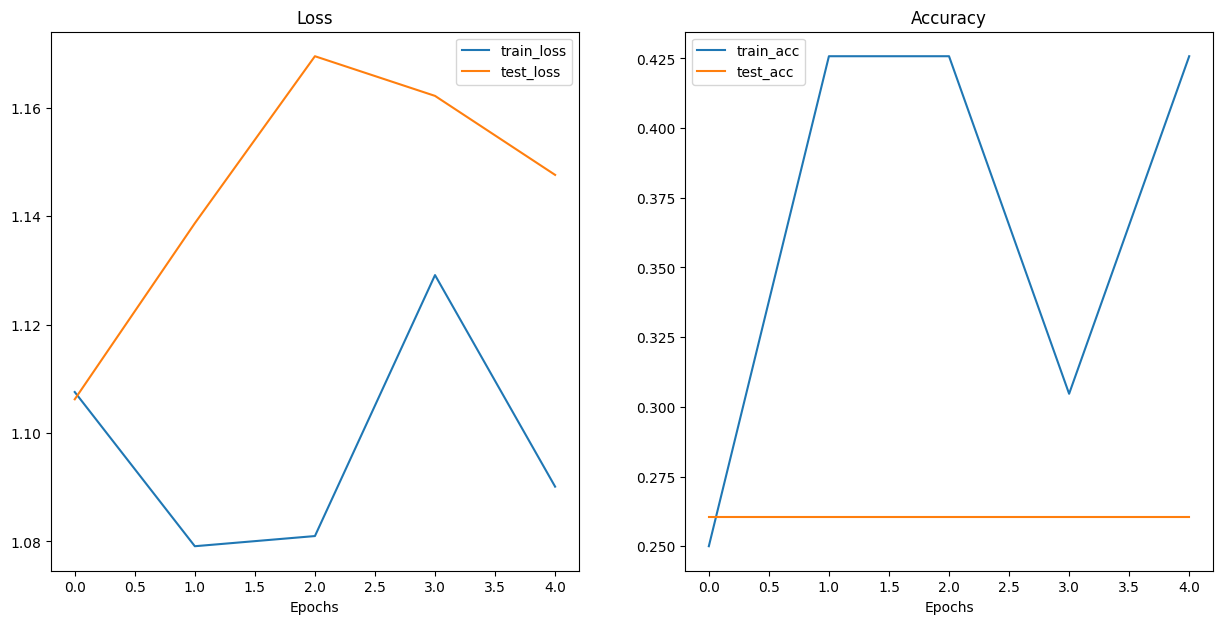

In [79]:
plot_loss_curves(model_1_results)

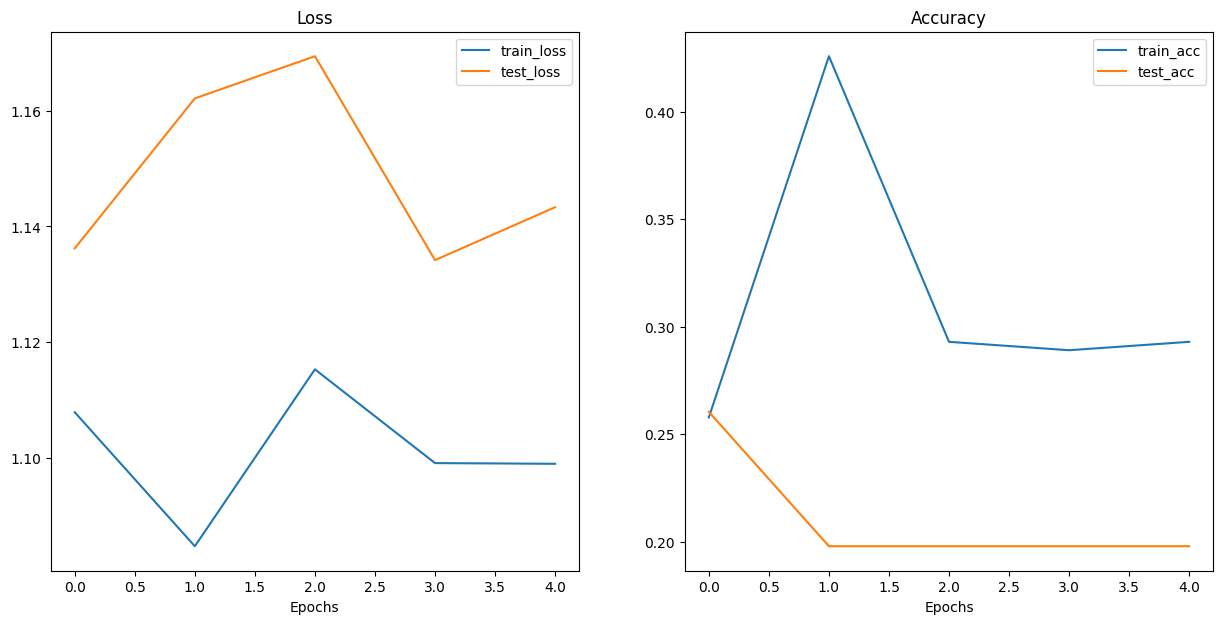

In [82]:
plot_loss_curves(model_0_results)

# 10. Compare model results

After evaulating our model experiments on their own, it's important to compare them to each other.

There's a few different ways to do this:
1. Hard coding - we're doing
2. PyTorch + Tensorboard
3. Weight & Biases - https://wandb.ai/site
4. MLFlow

In [84]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136207,0.260417
1,1.084645,0.425781,1.162168,0.197917
2,1.115261,0.292969,1.169467,0.197917
3,1.099034,0.289062,1.134171,0.197917
4,1.098916,0.292969,1.143333,0.197917


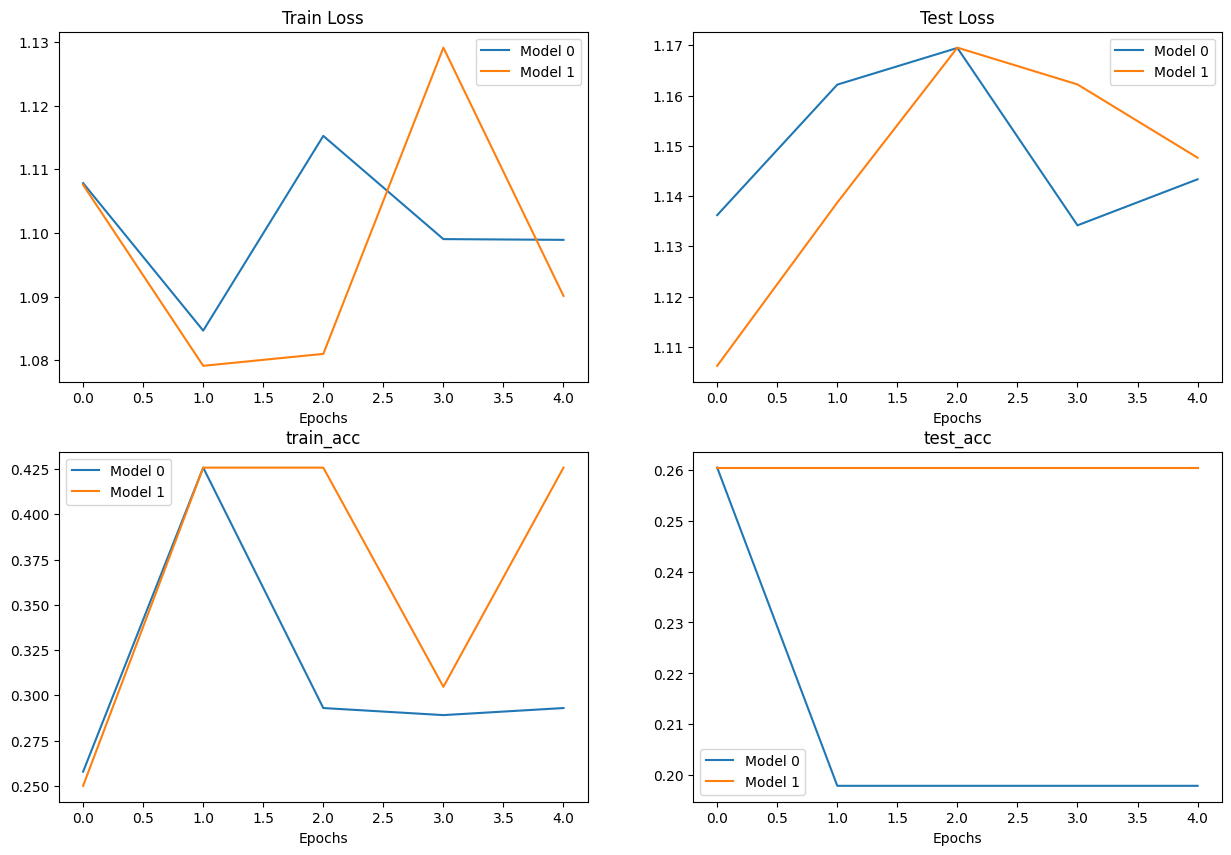

In [98]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# plot the train loss of our model
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label="Model 0")
plt.plot(epochs, model_1_df['train_loss'], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()


# plot the test loss of our model
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label="Model 0")
plt.plot(epochs, model_1_df['test_loss'], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# plot the train accuracy of our models
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_acc'], label="Model 0")
plt.plot(epochs, model_1_df['train_acc'], label="Model 1")
plt.title("train_acc")
plt.xlabel("Epochs")
plt.legend()

# plot the test accuracy of our models
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_acc'], label="Model 0")
plt.plot(epochs, model_1_df['test_acc'], label="Model 1")
plt.title("test_acc")
plt.xlabel("Epochs")
plt.legend()


# 11. Making a prediction on a custom image

Altrough we've trained a model on custom data...
but how do me make a prediction on a samlpe.image that's not in either training or testin

In [99]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/04-pizza-dad.jpeg")
    print(f"Downloading{custom_image_path}")
    f.write(request.content)
else:
  print(f"{custom_image_path} already existed, skipping downloading")

Downloadingdata/04-pizza-dad.jpg
